# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    • Which variables are significant in predicting the price of a car
    • How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

# Business Goal

To model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

# Reading and Understanding the Data

Import Libraries and packages

In [1]:
# Import required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Show all columns
pd.options.display.max_columns = None

Reading the CSV dataset

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv", encoding='iso-8859-1')

In [4]:
# Check the head of the dataset
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [5]:
# Check the shape of the dataset
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [8]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# Data Preparation

As we can see in the dataset, there is no column with missing data so no need to drop columns pr remove rows. 
However some actions will be required to tranform the data in the well-form

##### Columns treatments

In [9]:
cars.index = cars['car_ID']
cars = cars.drop('car_ID',axis=1)

Change the 'CarName' to have only the brand name and not the model name

In [10]:
cars['brand'] = cars['CarName'].apply(lambda x:x.split()[0])

In [11]:
cars['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### As we can see that some of the brands are present in short form while some of them are misspelled. Correct the brand names.

In [12]:
def brand_mapping(brand):
    if brand == 'vw' or brand == 'vokswagen':
        return 'volkswagen'
    elif brand == 'porcshce':
        return 'porsche'
    elif brand == 'maxda':
        return 'mazda'
    elif brand == 'Nissan':
        return 'nissan'
    elif brand == 'toyouta':
        return 'toyota'
    else:
        return brand

In [13]:
cars['brand'] = cars['brand'].apply(brand_mapping)

Unique brand names after transformation:

In [14]:
cars['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

As we have got brand name, we don't need carName now. So, Let's drop it.

In [15]:
cars = cars.drop('CarName', axis=1, errors='ignore')

In [16]:
car_brands = cars[['brand','price']].groupby('brand').mean().sort_values(by='price')
car_brands

price
brand                    
chevrolet     6007.000000
dodge         7875.444444
plymouth      7963.428571
honda         8184.692308
subaru        8541.250000
isuzu         8916.500000
mitsubishi    9239.769231
renault       9595.000000
toyota        9885.812500
volkswagen   10077.500000
nissan       10415.666667
mazda        10652.882353
saab         15223.333333
peugeot      15489.090909
alfa-romero  15498.333333
mercury      16503.000000
audi         17859.166714
volvo        18063.181818
bmw          26118.750000
porsche      31400.500000
buick        33647.000000
jaguar       34600.000000

##### Converting  numbers in the form of words to numeric
Columns 'cylindernumber' and 'doornumber' contain numbers in the form of words. Transform the data of these columns in numeric form

In [17]:
print('unique values in cylindernumber', cars['cylindernumber'].unique())
print('unique values in doornumber', cars['doornumber'].unique())

unique values in cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
unique values in doornumber ['two' 'four']


In [18]:
def word_to_num(x):
    dict = {'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12}
    return x.map(dict)

# Applying the function to the housing list
cars['cylindernumber'] = cars[['cylindernumber']].apply(word_to_num)
cars['doornumber'] = cars[['doornumber']].apply(word_to_num)


In [19]:
cars.head()

symboling fueltype aspiration  doornumber      carbody drivewheel  \
car_ID                                                                      
1               3      gas        std           2  convertible        rwd   
2               3      gas        std           2  convertible        rwd   
3               1      gas        std           2    hatchback        rwd   
4               2      gas        std           4        sedan        fwd   
5               2      gas        std           4        sedan        4wd   

       enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
car_ID                                                                         
1               front       88.6      168.8      64.1       48.8        2548   
2               front       88.6      168.8      64.1       48.8        2548   
3               front       94.5      171.2      65.5       52.4        2823   
4               front       99.8      176.6      66.2       54.3        2337   
5               front       99.4      176.6      66.4       54.3        2824   

       enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
car_ID                                                                        
1            dohc               4         130       mpfi       3.47    2.68   
2            dohc               4         130       mpfi       3.47    2.68   
3            ohcv               6         152       mpfi       2.68    3.47   
4             ohc               4         109       mpfi       3.19    3.40   
5             ohc               5         136       mpfi       3.19    3.40   

        compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
car_ID                                                                        
1                    9.0         111     5000       21          27  13495.0   
2                    9.0         111     5000       21          27  16500.0   
3                    9.0         154     5000       19          26  16500.0   
4                   10.0         102     5500       24          30  13950.0   
5                    8.0         115     5500       18          22  17450.0   

              brand  
car_ID               
1       alfa-romero  
2       alfa-romero  
3       alfa-romero  
4              audi  
5              audi

#### Segregate all the variables into **continuous** and **categorical**

In [20]:
def segregate_columns(df=cars):
    segregation = [{ 
                    "col":c,
                    "c_type": 'continuous' if df[c].nunique()>7 else 'categorical',
                    "unique_count":df[c].nunique()
                   } for c in df.columns ]
    
    return pd.DataFrame.from_records(segregation)

In [21]:
cars_columns = segregate_columns()
cars_columns

col       c_type  unique_count
0          symboling  categorical             6
1           fueltype  categorical             2
2         aspiration  categorical             2
3         doornumber  categorical             2
4            carbody  categorical             5
5         drivewheel  categorical             3
6     enginelocation  categorical             2
7          wheelbase   continuous            53
8          carlength   continuous            75
9           carwidth   continuous            44
10         carheight   continuous            49
11        curbweight   continuous           171
12        enginetype  categorical             7
13    cylindernumber  categorical             7
14        enginesize   continuous            44
15        fuelsystem   continuous             8
16         boreratio   continuous            38
17            stroke   continuous            37
18  compressionratio   continuous            32
19        horsepower   continuous            59
20           peakrpm   continuous            23
21           citympg   continuous            29
22        highwaympg   continuous            30
23             price   continuous           189
24             brand   continuous            22

#### Continous variables

In [22]:
cars_continuous_vars = cars_columns[cars_columns['c_type']=='continuous']['col'].tolist()
print(cars_continuous_vars)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand']


#### Categorical variables

In [23]:
cars_categorical_vars = cars_columns[cars_columns['c_type']=='categorical']['col'].tolist()
print(cars_categorical_vars)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']


## Data preparation on Continous Variables

Since the number of columns are slightly high, I will be taking 2 subsets to see the clear picture

In [24]:
subset1 = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'price']
subset2 = ['boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

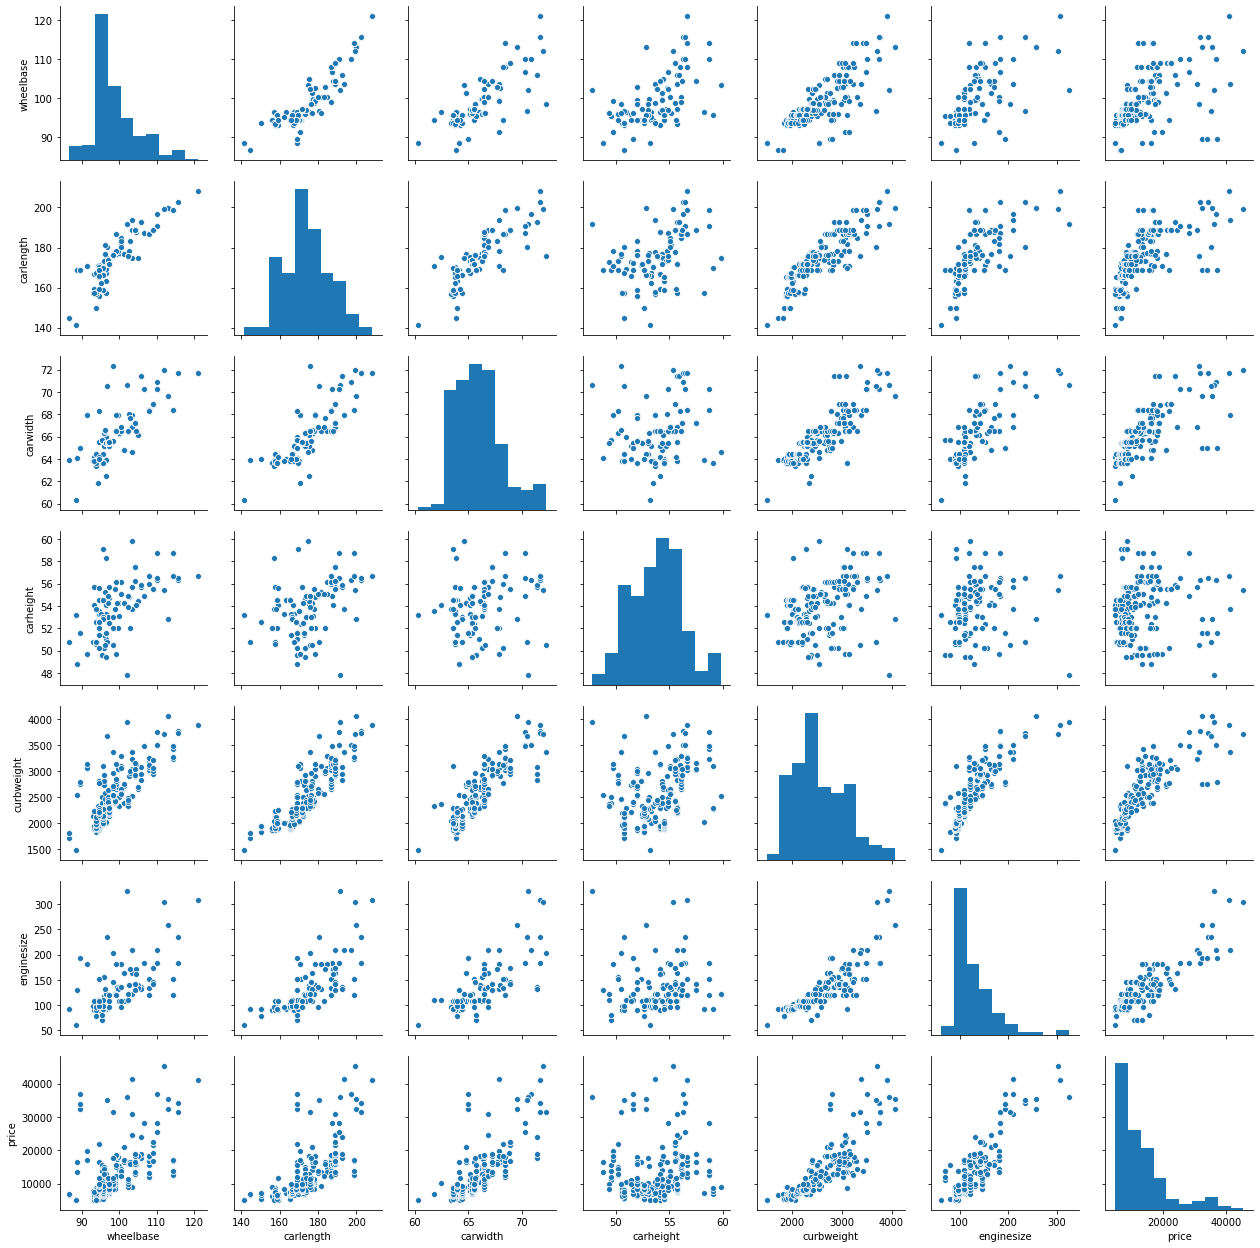

<Figure size 1440x1440 with 0 Axes>

In [25]:
# Making pairplot of all the numeric variables
sns.pairplot(cars[subset1])
plt.figure(figsize=(20, 20))
plt.show()

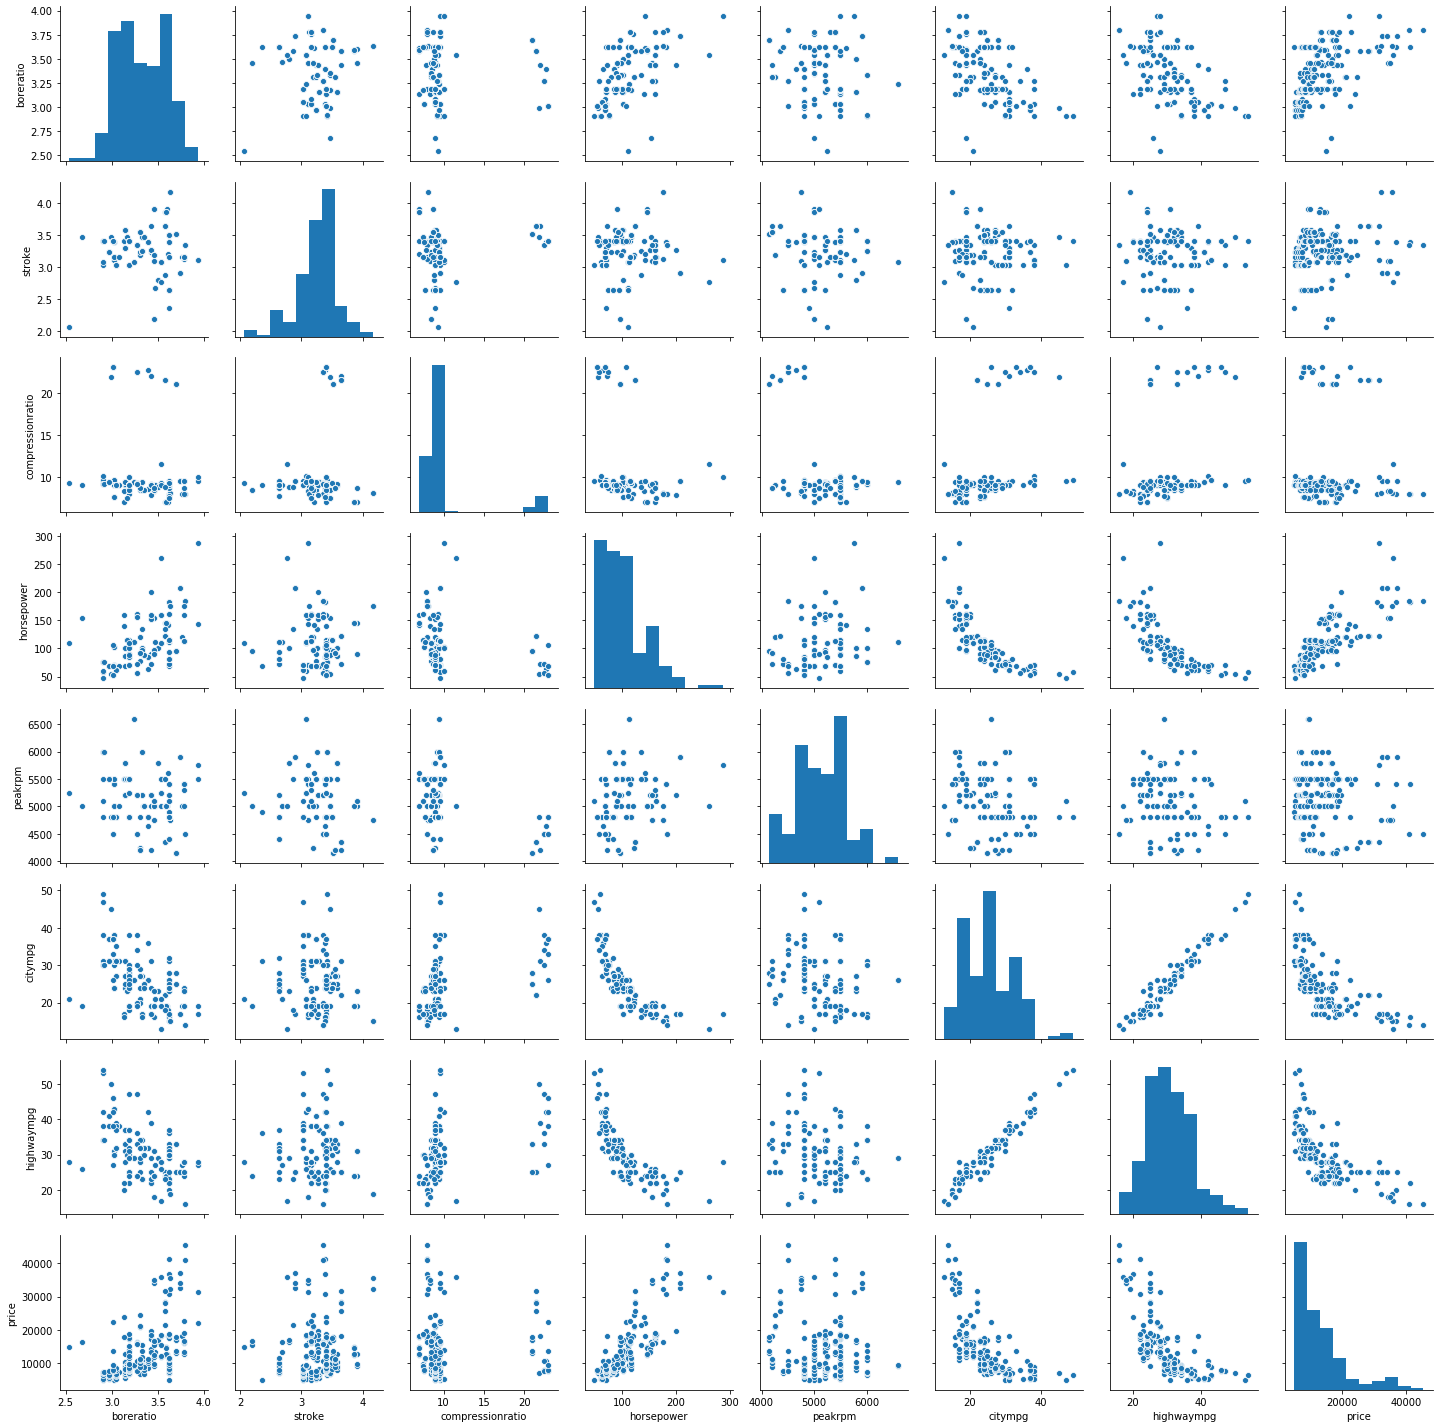

<Figure size 1440x1440 with 0 Axes>

In [26]:
# pairplot of subset-2
sns.pairplot(cars[subset2])
plt.figure(figsize=(20, 20))
plt.show()

#### Visualizing co-relation co-efficient of continuous variables

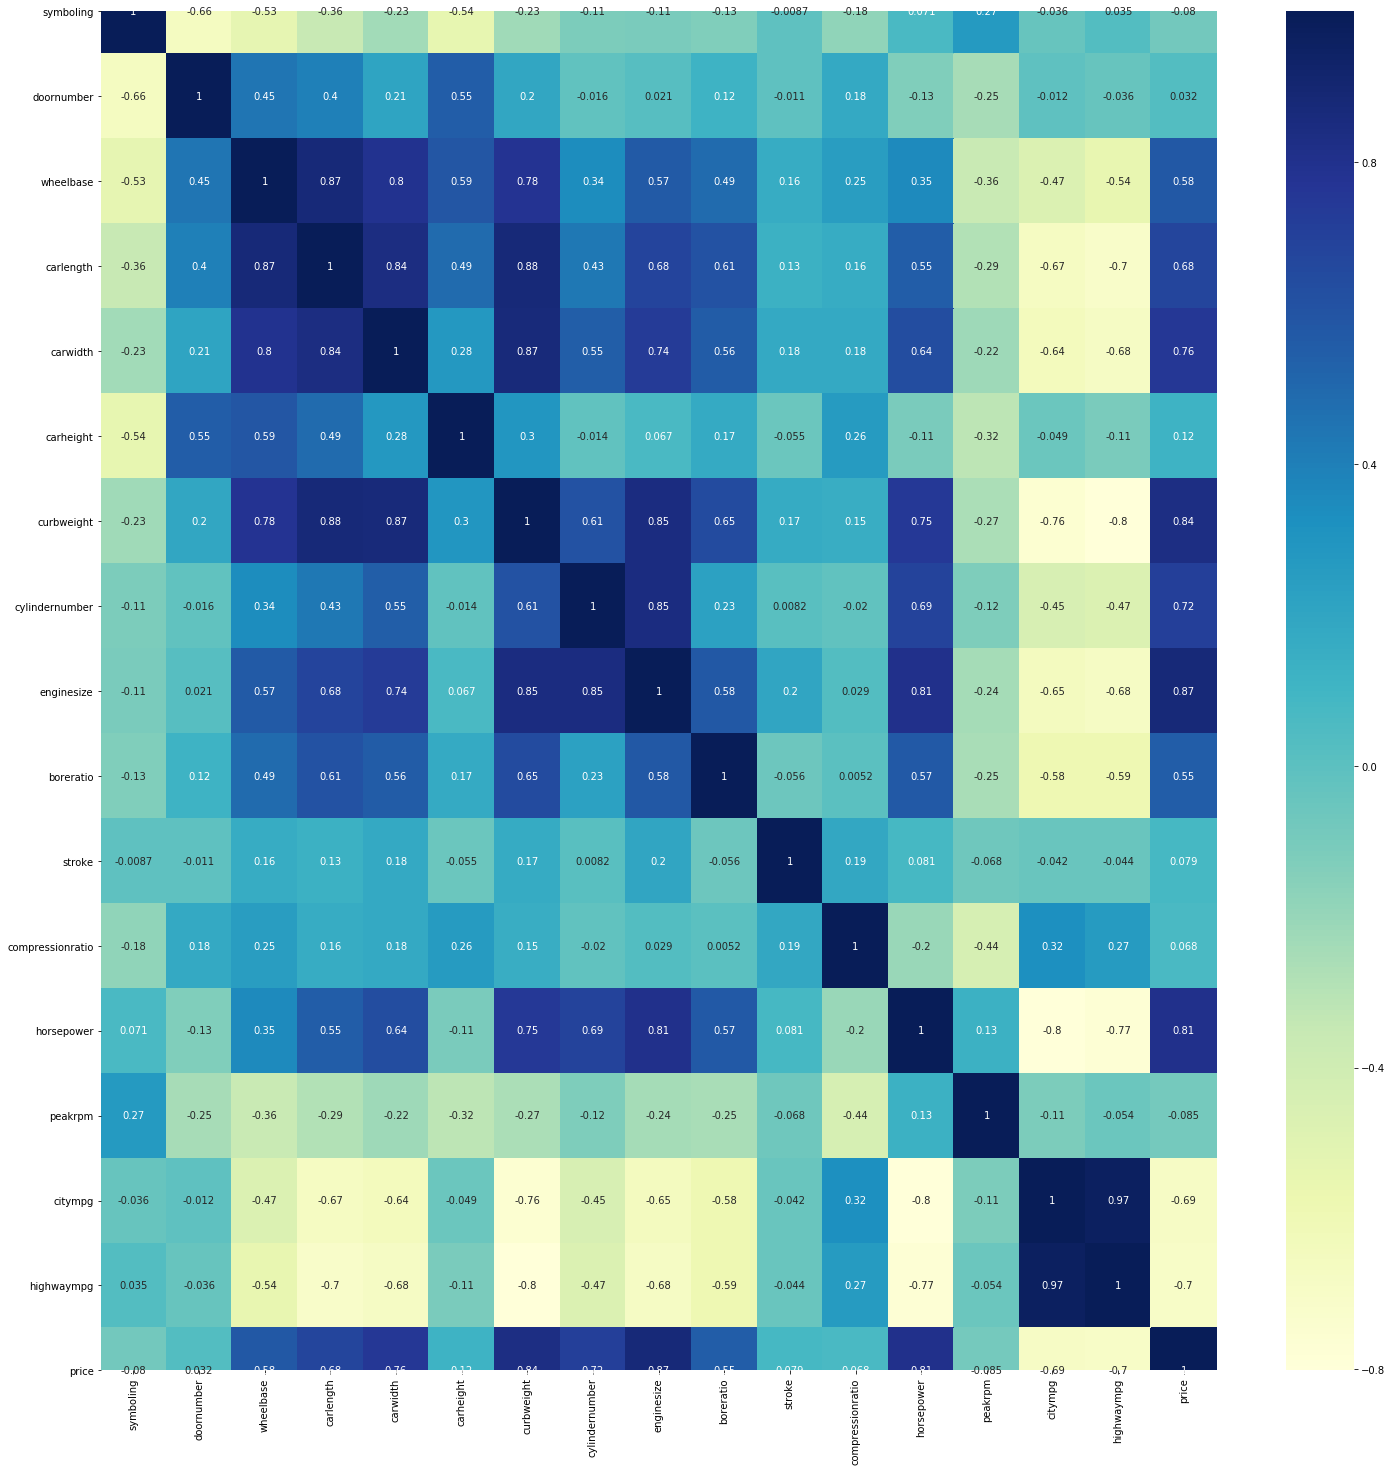

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights from the pairplot: 

• Price has positive linear relationship with columns: wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, and boreratio 

• Price has negative linear relationship with columns: citympg and highwaympg

• Price has week(or some sort of) linear relationship with columns: stroke, compressionratio

• Price has almost no linear relationship peakrpm and carheight hence these can be dropped

##### Drop 'symboling', 'peakrpm' and 'carheight' columns since they are not making sense for the analysis

In [28]:
cars.drop(['symboling', 'peakrpm', 'carheight'], axis = 1, inplace = True)

In [29]:
cars_categorical_vars.remove('symboling')

## Data preparation on Categorical Variables

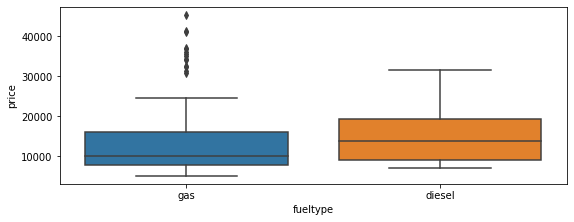

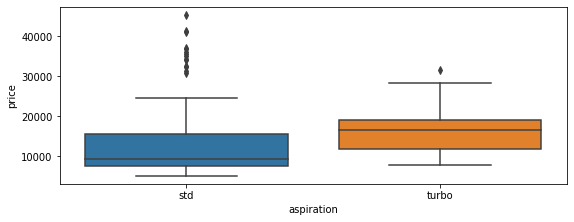

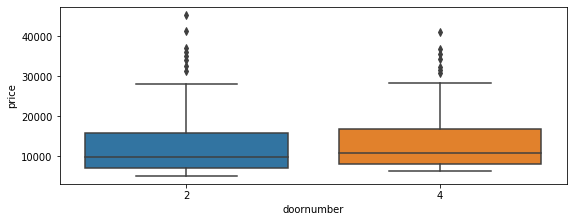

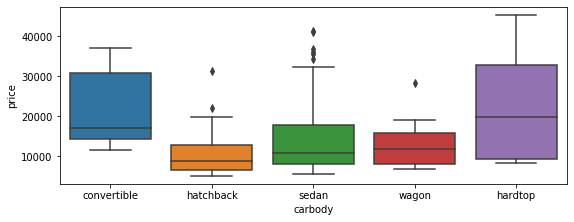

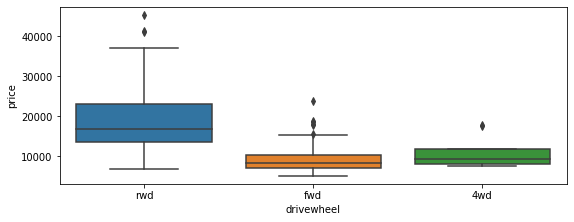

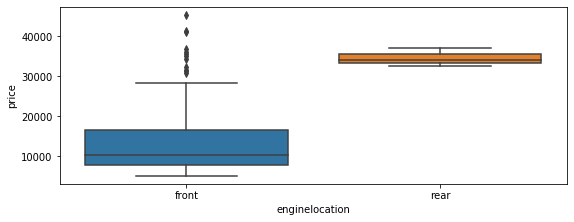

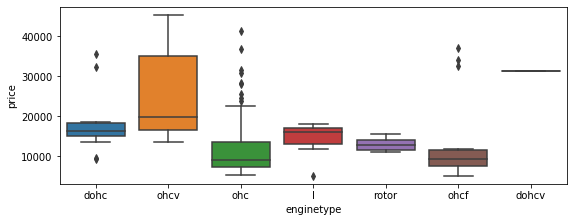

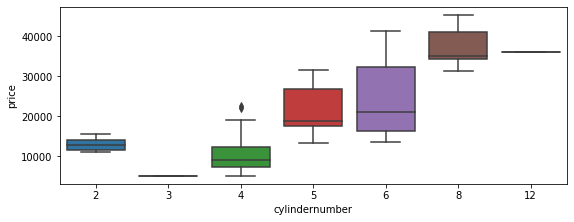

In [30]:
def drawCategorical():
    n = 1
    for item in cars_categorical_vars:
        plt.figure(figsize=(20, 15))
        plt.subplot(4,2,n)
        sns.boxplot(x = item, y = 'price', data = cars)
        plt.show()
        n = n+1
        
drawCategorical()

### Insights from the Boxplot: 

• Diesel vehicle are expensive than gas fuel type vehicles

• Price is increasing with increase in numbers of cylinders.

• Vehicles with rear engine location are expensive than front engine location.

• Symboling not significance and doornumber not making any difference as such so both can be dropped.

• enginelocation is mostly of front type, so not significant

In [31]:
cars.drop(['doornumber', 'enginelocation'], axis = 1, errors = 'ignore', inplace = True)

### Binning

In [32]:
def binning(df, bins, column, new_column, interval):
    interval.append(df[column].max() + 1)
    df[new_column] = pd.cut(df[column], interval, right=False, labels=bins)

In [33]:
binning(cars, ['standard', 'executive', 'premium'], 'price', 'category', [0, 10000, 20000])

In [34]:
cars.head()

fueltype aspiration      carbody drivewheel  wheelbase  carlength  \
car_ID                                                                     
1           gas        std  convertible        rwd       88.6      168.8   
2           gas        std  convertible        rwd       88.6      168.8   
3           gas        std    hatchback        rwd       94.5      171.2   
4           gas        std        sedan        fwd       99.8      176.6   
5           gas        std        sedan        4wd       99.4      176.6   

        carwidth  curbweight enginetype  cylindernumber  enginesize  \
car_ID                                                                
1           64.1        2548       dohc               4         130   
2           64.1        2548       dohc               4         130   
3           65.5        2823       ohcv               6         152   
4           66.2        2337        ohc               4         109   
5           66.4        2824        ohc               5         136   

       fuelsystem  boreratio  stroke  compressionratio  horsepower  citympg  \
car_ID                                                                        
1            mpfi       3.47    2.68               9.0         111       21   
2            mpfi       3.47    2.68               9.0         111       21   
3            mpfi       2.68    3.47               9.0         154       19   
4            mpfi       3.19    3.40              10.0         102       24   
5            mpfi       3.19    3.40               8.0         115       18   

        highwaympg    price        brand   category  
car_ID                                               
1               27  13495.0  alfa-romero  executive  
2               27  16500.0  alfa-romero  executive  
3               26  16500.0  alfa-romero  executive  
4               30  13950.0         audi  executive  
5               22  17450.0         audi  executive

### Convert Categorical variables to Dummy Variables

In [35]:
# List of categorical variables to map
categorical_list =  ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'category']
cars_features = cars

for i in categorical_list:
    column = pd.get_dummies(cars[i], drop_first = True)
    cars_features = pd.concat([cars, column], axis = 1)

cars_features.drop(categorical_list,axis =1, inplace = True)

In [36]:
cars_features.drop('CarName',axis =1, inplace = True, errors='ignore')

In [37]:
cars_features.head()


wheelbase  carlength  carwidth  curbweight  cylindernumber  \
car_ID                                                               
1            88.6      168.8      64.1        2548               4   
2            88.6      168.8      64.1        2548               4   
3            94.5      171.2      65.5        2823               6   
4            99.8      176.6      66.2        2337               4   
5            99.4      176.6      66.4        2824               5   

        enginesize  boreratio  stroke  compressionratio  horsepower  citympg  \
car_ID                                                                         
1              130       3.47    2.68               9.0         111       21   
2              130       3.47    2.68               9.0         111       21   
3              152       2.68    3.47               9.0         154       19   
4              109       3.19    3.40              10.0         102       24   
5              136       3.19    3.40               8.0         115       18   

        highwaympg    price        brand  executive  premium  
car_ID                                                        
1               27  13495.0  alfa-romero          1        0  
2               27  16500.0  alfa-romero          1        0  
3               26  16500.0  alfa-romero          1        0  
4               30  13950.0         audi          1        0  
5               22  17450.0         audi          1        0

### Heatmap

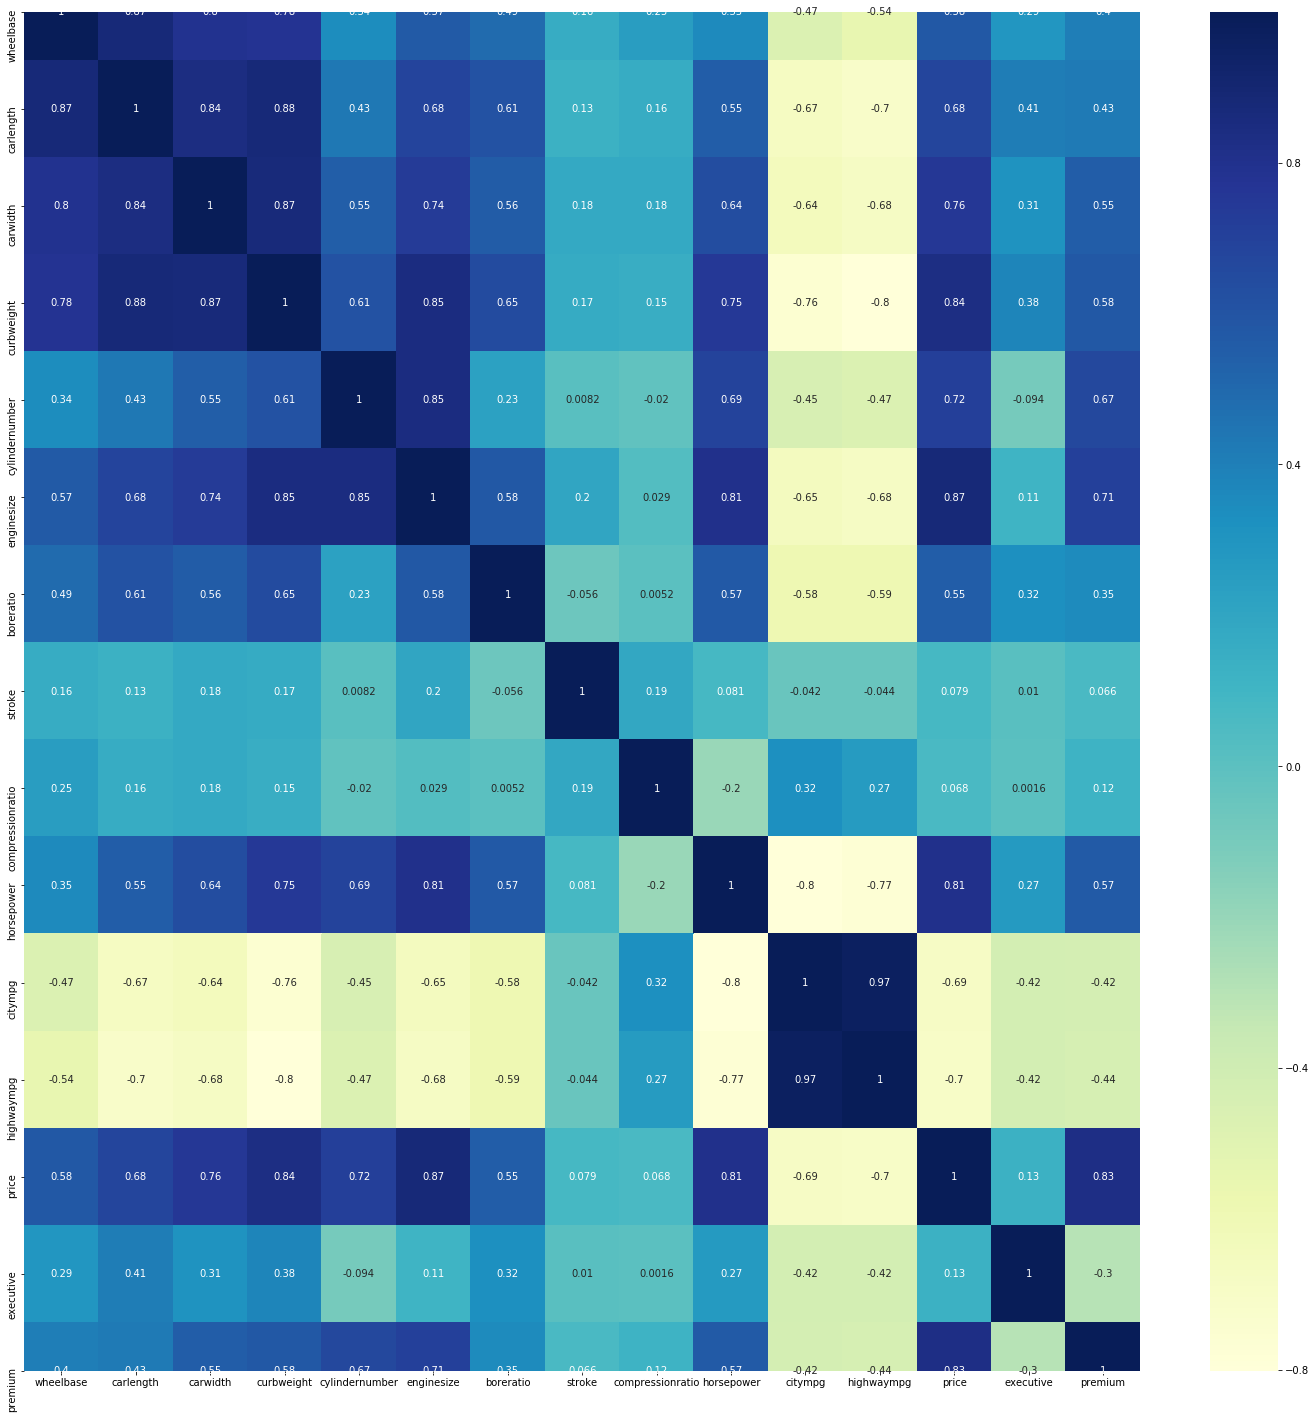

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(cars_features.corr(), annot = True, cmap="YlGnBu")
plt.show()

Drop some columns which are insignificant for the price

In [39]:
cars_features.drop(['spfi', 'spdi', 'mfi', 'compressionratio', 'stroke', '4bbl'], axis = 1, 
                   errors = 'ignore', inplace= True)

In [40]:
cars_features.drop(['brand'], axis =1, inplace=True)

# Split the Data into Training and Test Sets

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars_features, train_size = 0.7, test_size = 0.3, random_state = 100)

### Features Scalling

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
# Applying scaler() to all the columns except 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth','curbweight','cylindernumber','enginesize', 'boreratio', 
             'horsepower', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [44]:
df_train.head()

wheelbase  carlength  carwidth  curbweight  cylindernumber  \
car_ID                                                               
123      0.244828   0.426016  0.291667    0.272692             0.2   
126      0.272414   0.452033  0.666667    0.500388             0.2   
167      0.272414   0.448780  0.308333    0.314973             0.2   
2        0.068966   0.450407  0.316667    0.411171             0.2   
200      0.610345   0.775610  0.575000    0.647401             0.2   

        enginesize  boreratio  horsepower   citympg  highwaympg     price  \
car_ID                                                                      
123       0.139623   0.230159    0.083333  0.500000    0.567568  0.068818   
126       0.339623   1.000000    0.395833  0.166667    0.270270  0.466890   
167       0.139623   0.444444    0.266667  0.361111    0.324324  0.122110   
2         0.260377   0.626984    0.262500  0.222222    0.270270  0.314446   
200       0.260377   0.746032    0.475000  0.111111    0.135135  0.382131   

        executive  premium  
car_ID                      
123             0        0  
126             0        1  
167             0        0  
2               1        0  
200             1        0

In [45]:
df_train.describe()

wheelbase   carlength    carwidth  curbweight  cylindernumber  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.411141    0.525476    0.461655    0.407878        0.240559   
std      0.205581    0.204848    0.184517    0.211269        0.115818   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.272414    0.399187    0.304167    0.245539        0.200000   
50%      0.341379    0.502439    0.425000    0.355702        0.200000   
75%      0.503448    0.669919    0.550000    0.559542        0.200000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

       enginesize   boreratio  horsepower     citympg  highwaympg       price  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.241351    0.497946    0.227302    0.344211    0.374976    0.219310   
std      0.154619    0.207140    0.165511    0.186165    0.188477    0.215682   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.135849    0.305556    0.091667    0.166667    0.216216    0.067298   
50%      0.184906    0.500000    0.191667    0.333333    0.378378    0.140343   
75%      0.301887    0.682540    0.283333    0.500000    0.527027    0.313479   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        executive     premium  
count  143.000000  143.000000  
mean     0.363636    0.139860  
std      0.482737    0.348061  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000

# Building linear model

### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('price')
X_train = df_train

In [47]:
cars_features.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price', 'executive', 'premium'],
      dtype='object')

### Iteration-0: Adding all the variables and building the model

In [48]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

# Create Model and fit
ols = sm.OLS(y_train, X_train_lm)
lr_1 = ols.fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.26e-68
Time:                        00:23:54   Log-Likelihood:                 206.47
No. Observations:                 143   AIC:                            -386.9
Df Residuals:                     130   BIC:                            -348.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0481      0.042     -1.

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8          citympg  122.75
9       highwaympg  120.99
3       curbweight   71.46
1        carlength   69.39
2         carwidth   43.58
5       enginesize   43.38
4   cylindernumber   35.16
0        wheelbase   34.64
7       horsepower   20.49
6        boreratio   15.75
11         premium    4.26
10       executive    4.15

Utils to drop a given variable and rebuild the model

In [50]:
def dropAndRebuildModel(X_train, drop_var):
    # Dropping highly correlated variables and insignificant variables
    X = X_train.drop(drop_var, 1,)
    X_train_lm = sm.add_constant(X)
    lr_new = sm.OLS(y_train, X_train_lm).fit()
    
    # Print the summary of the model
    print(lr_new.summary())
    
    # Calculate the VIFs again for the new model
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return X, lr_new, X_train_lm

### Iteration-1

In [51]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'highwaympg')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.88e-70
Time:                        00:23:54   Log-Likelihood:                 206.46
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     131   BIC:                            -353.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0488      0.041     -1.

### Iteration-2

In [52]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'carwidth')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.19e-71
Time:                        00:23:54   Log-Likelihood:                 206.34
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     132   BIC:                            -358.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0476      0.041     -1.

### Iteration-3

In [53]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'wheelbase')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.14e-72
Time:                        00:23:54   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0408      0.040     -1.

### Iteration-4

In [54]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'carlength')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.97e-73
Time:                        00:23:54   Log-Likelihood:                 205.28
No. Observations:                 143   AIC:                            -392.6
Df Residuals:                     134   BIC:                            -365.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0265      0.038     -0.

### Iteration-5

In [55]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'citympg')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.65e-74
Time:                        00:23:54   Log-Likelihood:                 204.79
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     135   BIC:                            -369.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0018      0.024      0.

### Iteration-6

In [56]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'boreratio')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.97e-74
Time:                        00:23:54   Log-Likelihood:                 203.00
No. Observations:                 143   AIC:                            -392.0
Df Residuals:                     136   BIC:                            -371.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0292      0.017     -1.

### Iteration-7

In [57]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'cylindernumber')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     337.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.55e-75
Time:                        00:23:54   Log-Likelihood:                 202.11
No. Observations:                 143   AIC:                            -392.2
Df Residuals:                     137   BIC:                            -374.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.013     -3.429      0.0

### Iteration-8

In [58]:
X_train, lr_new, X_train_lm = dropAndRebuildModel(X_train, 'enginesize')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.89e-76
Time:                        00:23:54   Log-Likelihood:                 200.61
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     138   BIC:                            -376.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0439      0.013     -3.403      0.0

## Residual Analysis on the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_price = lr_new.predict(X_train_lm)

Text(0.5, 0, 'Errors')

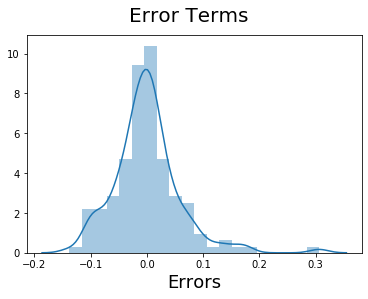

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [61]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

wheelbase  carlength   carwidth  curbweight  cylindernumber  \
count  62.000000  62.000000  62.000000   62.000000       62.000000   
mean    0.437764   0.559481   0.480376    0.428470        0.232258   
std     0.212861   0.189947   0.165440    0.179488        0.088288   
min     0.000000   0.056911   0.183333    0.128394        0.200000   
25%     0.313793   0.459350   0.358333    0.305275        0.200000   
50%     0.387931   0.547967   0.441667    0.406129        0.200000   
75%     0.570690   0.719919   0.516667    0.564876        0.200000   
max     1.182759   1.089431   0.975000    0.935609        0.600000   

       enginesize  boreratio  horsepower    citympg  highwaympg      price  \
count   62.000000  62.000000   62.000000  62.000000   62.000000  62.000000   
mean     0.265673   0.556580    0.248858   0.328405    0.363993   0.239439   
std      0.162820   0.228484    0.163376   0.172009    0.181845   0.233076   
min      0.067925  -0.111111    0.016667   0.027778   -0.027027   0.007763   
25%      0.177358   0.404762    0.107292   0.166667    0.216216   0.092342   
50%      0.226415   0.563492    0.218750   0.305556    0.351351   0.158991   
75%      0.316038   0.746032    0.295833   0.444444    0.459459   0.317243   
max      0.932075   0.888889    0.662500   0.694444    0.810811   1.112855   

       executive    premium  
count  62.000000  62.000000  
mean    0.435484   0.096774  
std     0.499868   0.298064  
min     0.000000   0.000000  
25%     0.000000   0.000000  
50%     0.000000   0.000000  
75%     1.000000   0.000000  
max     1.000000   1.000000

#### Dividing into X_test and y_test

In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [65]:
# Creating the final X_test dataframe by picking final remaining variables from the X_test

X_test_final = X_test_new[["const", "curbweight", "horsepower", "executive", "premium"]]

In [66]:
# Making predictions using the model

y_pred_final = lr_new.predict(X_test_final)

# Model Evaluation

### R2 score

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.8846675576572555

### Mean Squared Error

In [68]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred_final)
mse

0.006164315468499927

### Model visualization

Text(0, 0.5, 'y_pred')

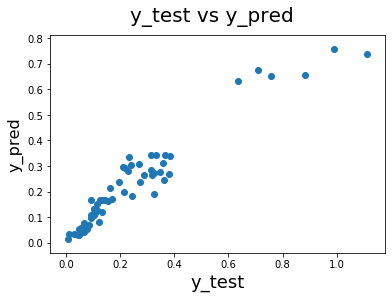

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Model variables

    • curbweight: weight of the car
    • horsepower: The Engine capacity 
    • executive: Car segment - mid range
    • premium : Car segment - Luxuarious

### Final Co-efficients

In [70]:
# Find the constants of the variables derived
lr_new.params

const        -0.043922
curbweight    0.308820
horsepower    0.299118
executive     0.058106
premium       0.344276
dtype: float64

### Equation building

So, the equation of our best fitted line is:

$ price = 0.309  \times  curbweight + 0.23  \times  horsepower + 0.058 \times executive + 0.344 \times premium $